## Reading Raw Files

Python supports a number of standard and custom libraries to read files of all types into python variables.

In [1]:
import os

#Read the file using standard python libaries
with open(os.getcwd()+ "/example.txt", 'r') as fh:  
    filedata = fh.read()
    
#Print first 200 characters in the file
print("Data read from file : ", filedata[0:200] )

Data read from file :  ABANDON ALL HOPE YE WHO ENTER HERE is scrawled in blood red lettering on the side of the Chemical Bank near the corner of Eleventh and First and is in print large enough to be seen from the backseat o


## Reading using NLTK CorpusReader

Read the same text file using a Corpus Reader

NLTK supports multiple CorpusReaders depending upon the type of data source. Details available in http://www.nltk.org/howto/corpus.html


In [2]:
#install nltk from anaconda prompt using "pip install nltk"
import nltk
#Download punkt package, used part of the other commands
nltk.download('punkt')

from nltk.corpus.reader.plaintext import PlaintextCorpusReader

#Read the file into a corpus. The same command can read an entire directory
corpus=PlaintextCorpusReader(os.getcwd(),"example.txt")

#Print raw contents of the corpus
print(corpus.raw())

ABANDON ALL HOPE YE WHO ENTER HERE is scrawled in blood red lettering on the side of the Chemical Bank near the corner of Eleventh and First and is in print large enough to be seen from the backseat of the cab as it lurches forward in the traffic leaving Wall Street and just as Timothy Price notices the words a bus pulls up, the advertisement for Les Miserables on its side blocking his view, but Price who is with Pierce & Pierce and twenty-six doesn’t seem to care because he tells the driver he will give him five dollars to turn up the radio, “Be My Baby” on WYNN, and the driver, black, not American, does so.
“I’m resourceful,” Price is saying. “I’m creative, I’m young, unscrupulous, highly motivated, highly skilled. In essence what I’m saying is that society cannot afford to lose me. I’m an asset.” Price calms down, continues to stare out the cab’s dirty window, probably at the word FEAR sprayed in red graffiti on the side of a McDonald’s on Fourth and Seventh. “I mean the fact remain

[nltk_data] Downloading package punkt to /Users/moo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Exploring the Corpus

The corpus library supports a number of functions to extract words, paragraphs and sentences from the corpus

In [3]:
#Extract the file IDs from the corpus
print("Files in this corpus : ", corpus.fileids())

#Extract paragraphs from the corpus
paragraphs=corpus.paras()
print("\n Total paragraphs in this corpus : ", len(paragraphs))

#Extract sentences from the corpus
sentences=corpus.sents()
print("\n Total sentences in this corpus : ", len(sentences))
print("\n The first sentence : ", sentences[0])

#Extract words from the corpus
print("\n Words in this corpus : ",corpus.words() )




Files in this corpus :  ['example.txt']

 Total paragraphs in this corpus :  2

 Total sentences in this corpus :  14

 The first sentence :  ['ABANDON', 'ALL', 'HOPE', 'YE', 'WHO', 'ENTER', 'HERE', 'is', 'scrawled', 'in', 'blood', 'red', 'lettering', 'on', 'the', 'side', 'of', 'the', 'Chemical', 'Bank', 'near', 'the', 'corner', 'of', 'Eleventh', 'and', 'First', 'and', 'is', 'in', 'print', 'large', 'enough', 'to', 'be', 'seen', 'from', 'the', 'backseat', 'of', 'the', 'cab', 'as', 'it', 'lurches', 'forward', 'in', 'the', 'traffic', 'leaving', 'Wall', 'Street', 'and', 'just', 'as', 'Timothy', 'Price', 'notices', 'the', 'words', 'a', 'bus', 'pulls', 'up', ',', 'the', 'advertisement', 'for', 'Les', 'Miserables', 'on', 'its', 'side', 'blocking', 'his', 'view', ',', 'but', 'Price', 'who', 'is', 'with', 'Pierce', '&', 'Pierce', 'and', 'twenty', '-', 'six', 'doesn', '’', 't', 'seem', 'to', 'care', 'because', 'he', 'tells', 'the', 'driver', 'he', 'will', 'give', 'him', 'five', 'dollars', 'to', 

## Analyze the Corpus

The NLTK library provides a number of functions to analyze the distributions and aggregates for data in the corpus.

Top 10 words in the corpus after removing stopwords and punctuation: [('Price', 4), ('side', 3), ('bus', 3), ('word', 3), ('red', 2), ('enough', 2), ('cab', 2), ('Les', 2), ('Miserables', 2), ('Pierce', 2)]


[nltk_data] Downloading package stopwords to /Users/moo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


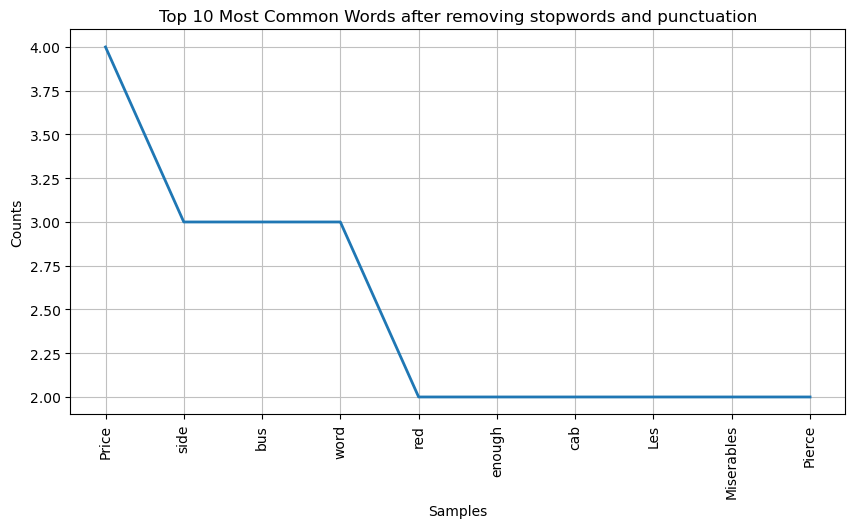

In [4]:
import matplotlib.pyplot as plt

# Download stopwords and get the list
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Filter out stopwords and punctuation from the corpus words
filtered_words = [word for word in corpus.words() if word.lower() not in stop_words and word.isalnum()]

# Find the frequency distribution of words in the corpus after removing stopwords and punctuation
course_freq_dist = nltk.FreqDist(filtered_words)

# Print most commonly used words
print("Top 10 words in the corpus after removing stopwords and punctuation:", course_freq_dist.most_common(10))

# Plot the most common words
plt.figure(figsize=(10, 5))
course_freq_dist.plot(10, title="Top 10 Most Common Words after removing stopwords and punctuation")
plt.show()

### Bigrams Analysis

Instead of just single words, we can also analyze common pairs of words.


Top 10 Bigrams after removing stopwords and punctuation:  [(('Les', 'Miserables'), 2), (('ABANDON', 'HOPE'), 1), (('HOPE', 'YE'), 1), (('YE', 'ENTER'), 1), (('ENTER', 'scrawled'), 1), (('scrawled', 'blood'), 1), (('blood', 'red'), 1), (('red', 'lettering'), 1), (('lettering', 'side'), 1), (('side', 'Chemical'), 1)]


[nltk_data] Downloading package stopwords to /Users/moo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


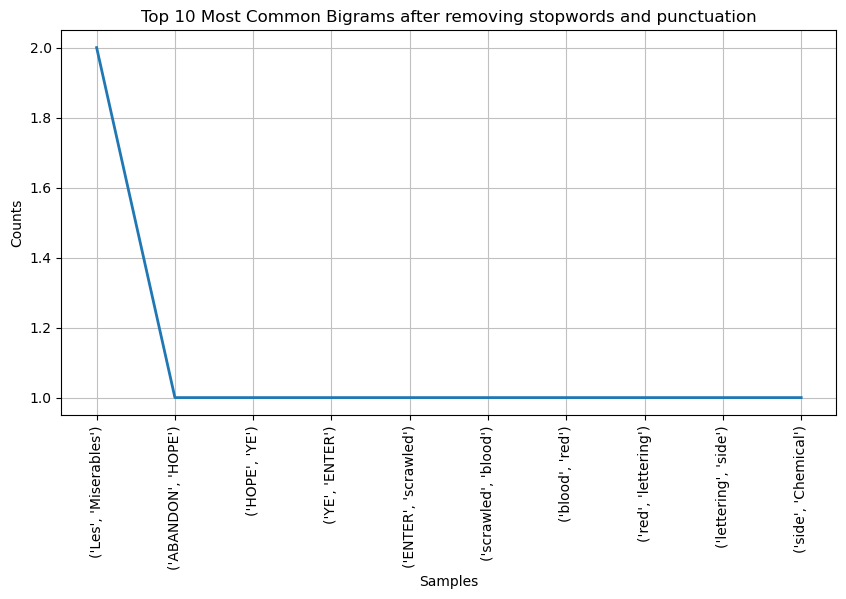

In [5]:
# Download stopwords and get the list
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# Filter out stopwords and punctuation from the corpus words
filtered_words = [word for word in corpus.words() if word.lower() not in stop_words and word.isalnum()]

# Generate bigrams from the cleaned list of words
bigrams = nltk.bigrams(filtered_words)

# Find the frequency distribution of bigrams
bigram_freq = nltk.FreqDist(bigrams)

# Print the top 10 bigrams
print("\nTop 10 Bigrams after removing stopwords and punctuation: ", bigram_freq.most_common(10))

# Plot the most common bigrams
plt.figure(figsize=(10, 5))
bigram_freq.plot(10, title="Top 10 Most Common Bigrams after removing stopwords and punctuation")
plt.show()

### Lexical Diversity

Calculate the ratio of unique words to the total number of words.

In [6]:
# Number of Unique Words
unique_words = len(set(corpus.words()))
print(f"\nNumber of Unique Words: {unique_words}")


# Lexical Diversity
lexical_diversity = unique_words / len(corpus.words())
print(f"\nLexical Diversity: {lexical_diversity:.2f}")

# Words longer than 10 letters
long_words = [w for w in corpus.words() if len(w) > 10]
print(f"\nWords longer than 10 letters (first 10): {long_words[:10]}")


Number of Unique Words: 216

Lexical Diversity: 0.57

Words longer than 10 letters (first 10): ['advertisement', 'resourceful', 'unscrupulous', 'alternative']
